# Random Forest Classification

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load Data and Process

In [156]:
#Import csv file
#check if it transfered correctly
airline="Tableu_Ready_Airline_Data.csv"
airline_df = pd.read_csv(airline)
airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [157]:
#get shape of DataFrame
airline_df.shape

(129487, 24)

In [158]:
#get DataFrame details
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   customer_type                      129487 non-null  object 
 3   age                                129487 non-null  int64  
 4   type_of_travel                     129487 non-null  object 
 5   customer_class                     129487 non-null  object 
 6   flight_distance                    129487 non-null  int64  
 7   inflight_wifi_service              129487 non-null  int64  
 8   departure_arrival_time_convenient  129487 non-null  int64  
 9   ease_of_online_booking             129487 non-null  int64  
 10  gate_location                      129487 non-null  int64  
 11  food_and_drink                     1294

In [159]:
# check for null values in DataFrame
airline_df.isnull().sum()

Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

# Feature Engineering
# one Hot Encoding Transforming categorical into numeric

In [160]:
# get unique value of the Gender column
airline_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [161]:
#get the dummies
pd.get_dummies(airline_df['Gender']).head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [162]:
#Apply one hot encoding
Sex = pd.get_dummies(airline_df['Gender'], drop_first=True)
Sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [163]:
# check unique values of type_of_travel column
airline_df.type_of_travel.unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [164]:
#get dummies of type of travel column
pd.get_dummies(airline_df['type_of_travel']).head()

,Business travel,Personal Travel
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [165]:
#Apply one hot encoding
travel_type = pd.get_dummies(airline_df['type_of_travel'], drop_first=True)
travel_type.head()

,Personal Travel
0,1
1,0
2,0
3,0
4,0


In [166]:
# get unique value of customer class column
airline_df.customer_class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [167]:
# get the dummies
pd.get_dummies(airline_df['customer_class']).head()

,Business,Eco,Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [168]:
#Apply one hot encoding
travel_class = pd.get_dummies(airline_df['customer_class'])
travel_class.head()

,Business,Eco,Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [169]:
# get the unique value of customer type column
airline_df.customer_type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [170]:
# get dummies
pd.get_dummies(airline_df['customer_type']).head()

,Loyal Customer,disloyal Customer
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [ ]:
# 

In [171]:
# Save the customer type new column to customer type DataFrame
customer = pd.get_dummies(airline_df['customer_type'], drop_first=True)
customer.head()

,disloyal Customer
0,0
1,1
2,0
3,0
4,0


# Concatenate the above DataFrames into original DataFrame

In [172]:
# Concatenate the abpve DataFrames to the original
new_airline_df = pd.concat([airline_df, Gender, customer_type, travel_type, customer_class], axis=1)

In [173]:
#display new DataFrame
new_airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Male,disloyal Customer,Personal Travel,Business,Eco,Eco Plus
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,25,18.0,neutral or dissatisfied,1,0,1,0,0,1
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,6.0,neutral or dissatisfied,1,1,0,1,0,0
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,0,0.0,satisfied,0,0,0,1,0,0
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,11,9.0,neutral or dissatisfied,0,0,0,1,0,0
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,0,0.0,satisfied,1,0,0,1,0,0


In [174]:
# drop repeated columns
new_airline_df.drop(['Unnamed: 0', 'Gender', 'customer_type', 'type_of_travel', 'customer_class'], axis=1, inplace=True)
new_airline_df.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Male,disloyal Customer,Personal Travel,Business,Eco,Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,25,18.0,neutral or dissatisfied,1,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,1,6.0,neutral or dissatisfied,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,5,0,0.0,satisfied,0,0,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,2,11,9.0,neutral or dissatisfied,0,0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,0,0.0,satisfied,1,0,0,1,0,0


In [175]:
# check DataFrame details again
new_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   age                                129487 non-null  int64  
 1   flight_distance                    129487 non-null  int64  
 2   inflight_wifi_service              129487 non-null  int64  
 3   departure_arrival_time_convenient  129487 non-null  int64  
 4   ease_of_online_booking             129487 non-null  int64  
 5   gate_location                      129487 non-null  int64  
 6   food_and_drink                     129487 non-null  int64  
 7   online_boarding                    129487 non-null  int64  
 8   seat_comfort                       129487 non-null  int64  
 9   inflight_entertainment             129487 non-null  int64  
 10  onboard_service                    129487 non-null  int64  
 11  leg_room_service                   1294

# Create Seperate Target Variable

In [176]:
#make new Dataframe for satisfaction column
Y = new_airline_df.satisfaction
Y.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [177]:
#check unique values
Y.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [178]:
Y = Y.map({'neutral or dissatisfied': 0, 'satisfied': 1})
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [179]:
#drop the target column: satisfaction
new_airline_df.drop('satisfaction', inplace=True, axis=1)
new_airline_df.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Male,disloyal Customer,Personal Travel,Business,Eco,Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,1,0,0


In [180]:
#check DataFrame details
new_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   age                                129487 non-null  int64  
 1   flight_distance                    129487 non-null  int64  
 2   inflight_wifi_service              129487 non-null  int64  
 3   departure_arrival_time_convenient  129487 non-null  int64  
 4   ease_of_online_booking             129487 non-null  int64  
 5   gate_location                      129487 non-null  int64  
 6   food_and_drink                     129487 non-null  int64  
 7   online_boarding                    129487 non-null  int64  
 8   seat_comfort                       129487 non-null  int64  
 9   inflight_entertainment             129487 non-null  int64  
 10  onboard_service                    129487 non-null  int64  
 11  leg_room_service                   1294

# Split the data into Training and Test data

In [189]:
# Split the data into X_train, X_test, y_train, y_test
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [190]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (90640, 23)
X_test (38847, 23)
Y_train (90640,)
Y_test (38847,)


# Train Random Forest Classification

In [191]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Fit the model to the training data
classifier = RandomForestClassifier(n_estimators=500, criterion ='entropy', random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

# Predict the Test Results

In [192]:
#get prediction for 
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

# Confusion Matrix

In [194]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21443   414]
 [ 1039 15951]]


In [195]:
accuracy_score(y_test, y_pred)

0.9625968543259453

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     21857
           1       0.97      0.94      0.96     16990

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



# Try with different number of trees and gini criteria

In [200]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2500, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2500, random_state=0)

In [201]:
y_pred = classifier.predict(X_test)

In [202]:
accuracy_score(y_test, y_pred)

0.9632661466779932

# Try with more trees for the third and final time

In [208]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Fit the model to the training data
classifier = RandomForestClassifier(n_estimators=5000, criterion ='gini', random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=1)

In [209]:
y_pred = classifier.predict(X_test)

In [210]:
accuracy_score(y_test, y_pred)

0.9632404046644528

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21857
           1       0.97      0.94      0.96     16990

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [ ]:
# Random Forest Classifier has an accuracy rate of 96% after three trials with increase trees and change in 
# criterion. Adding mmore trees and changing the criterion didn't make much of a difference from the first trial.
# Moving forward, focusing on just the most important features might decrease the model impurity more and produce
# a higher accuracy

# Lookup and Display the features that Impacted the Decrease in Model's Impurity

In [215]:
# What features made the most impact on decreasing model impurities
classifier.feature_importances_

array([0.01935035, 0.00428473, 0.037077  , 0.03068561, 0.09568168,
       0.09802019, 0.03589578, 0.14289748, 0.01712815, 0.03771908,
       0.01566189, 0.01179022, 0.16431952, 0.04594334, 0.0569855 ,
       0.02972035, 0.03834796, 0.02405404, 0.02359017, 0.02356982,
       0.02557235, 0.0101607 , 0.01154406])

In [216]:
#display array in columns
X_train.columns

Index(['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')

In [217]:
# combine the important features and their column names
importance = classifier.feature_importances_
columns = X_train.columns

In [218]:
combined_features = pd.Series(importance, columns)
combined_features

Unnamed: 0                           0.019350
Gender                               0.004285
customer_type                        0.037077
age                                  0.030686
type_of_travel                       0.095682
customer_class                       0.098020
flight_distance                      0.035896
inflight_wifi_service                0.142897
departure_arrival_time_convenient    0.017128
ease_of_online_booking               0.037719
gate_location                        0.015662
food_and_drink                       0.011790
online_boarding                      0.164320
seat_comfort                         0.045943
inflight_entertainment               0.056986
onboard_service                      0.029720
leg_room_service                     0.038348
baggage_handling                     0.024054
checkin_service                      0.023590
inflight_service                     0.023570
cleanliness                          0.025572
departure_delay_in_minutes        

# Display how much each feature contributed to decreasing the weighted impurity in the model

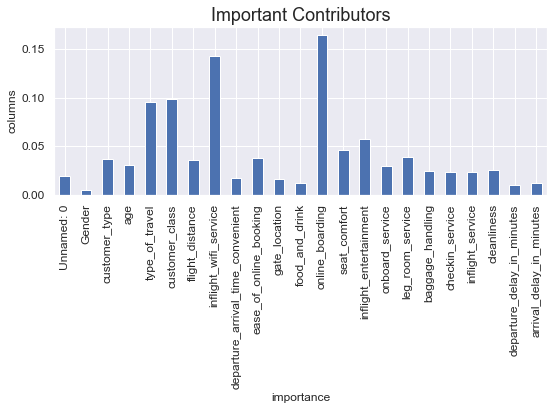

In [223]:
from matplotlib import pyplot as plt
pandas_plot = combined_features.plot.bar(figsize=(8,6), color='b', fontsize = 12)
plt.xlabel("importance", fontsize = 12)
plt.ylabel("columns", fontsize = 12)
plt.title("Important Contributors", fontsize = 18)
plt.tight_layout()
plt.show()

# Plot Confusion Matrix

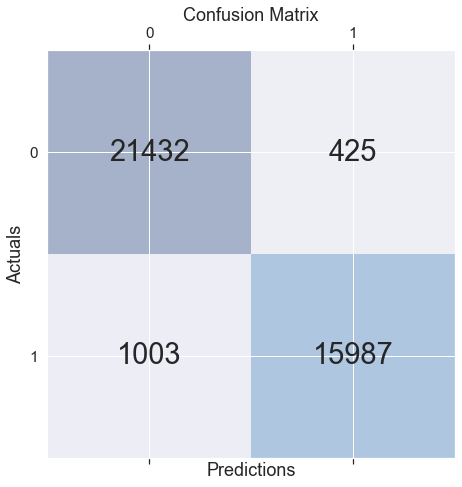

In [224]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()